In [ ]:
! wget https://raw.githubusercontent.com/alok676875/RDP/main/RDP.sh &> /dev/null
! chmod +x RDP.sh
! ./RDP.sh

chmod: cannot access 'RDP.sh': No such file or directory
/bin/bash: ./RDP.sh: No such file or directory


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload a file manually

Saving hepatitis (2).csv to hepatitis (2).csv


In [ ]:
import pandas as pd
df = pd.read_csv('hepatitis (2).csv')  # Adjust filename if needed


In [ ]:
# Convert all column names to uppercase for consistency
df.columns = df.columns.str.upper()

In [ ]:
# Print available columns so you can verify the target column name
print("Columns in dataset:", df.columns.tolist())

Columns in dataset: ['CLASS', 'AGE', 'SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME', 'HISTOLOGY']


In [ ]:

# If your target column is not 'CLASS', change the variable below accordingly.
target_col = 'CLASS'
if target_col not in df.columns:
    raise KeyError(f"Target column '{target_col}' not found. Please check the dataset columns.")


In [ ]:
# Display the first few rows and info about the dataset
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Head:
   class  age  sex  steroid  antivirals  fatigue  malaise  anorexia  \
0      2   30    2        1           2        2        2         2   
1      2   50    1        1           2        1        2         2   
2      2   78    1        2           2        1        2         2   
3      2   34    1        2           2        2        2         2   
4      2   34    1        2           2        2        2         2   

   liver_big  liver_firm  spleen_palable  spiders  ascites  varices  \
0          1           2               2        2        2        2   
1          1           2               2        2        2        2   
2          2           2               2        2        2        2   
3          2           2               2        2        2        2   
4          2           2               2        2        2        2   

   bilirubin  alk_phosphate  sgot  albumin  protime  histology  
0        1.0             85    18      4.0       61          1  
1 


Distribution of sex column:


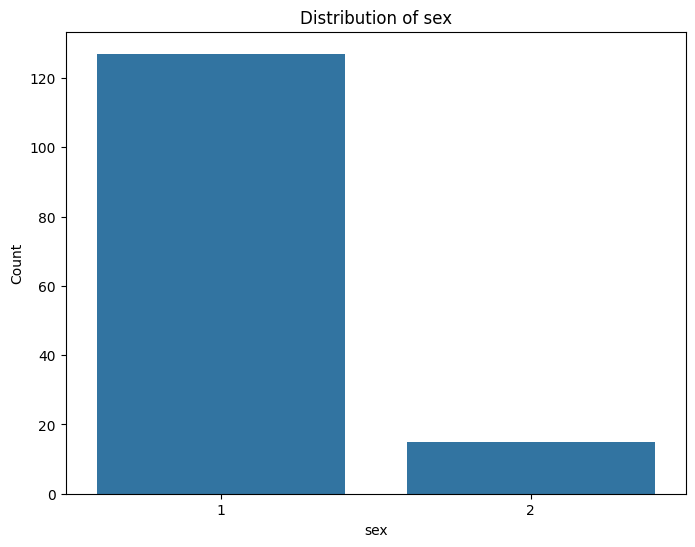

In [ ]:
# prompt:  Display the distribution of the SEX column and fix this eureuer  Distribution of SEX column:
# ---------------------------------------------------------------------------
# KeyError                                  Traceback (most recent call last)
# /usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
#    3804         try:
# -> 3805             return self._engine.get_loc(casted_key)
#    3806         except KeyError as err:
# index.pyx in pandas._libs.index.IndexEngine.get_loc()
# index.pyx in pandas._libs.index.IndexEngine.get_loc()
# pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()
# pandas/_libs/hashtable_class_helper.pxi in pandas._libs.hashtable.PyObjectHashTable.get_item()
# KeyError: 'SEX'
# The above exception was the direct cause of the following exception:
# KeyError                                  Traceback (most recent call last)
# 2 frames
# /usr/local/lib/python3.11/dist-packages/pandas/core/indexes/base.py in get_loc(self, key)
#    3810             ):
#    3811                 raise InvalidIndexError(key)
# -> 3812             raise KeyError(key) from err
#    3813         except TypeError:
#    3814             # If we have a listlike key, _check_indexing_error will raise
# KeyError: 'SEX'

import matplotlib.pyplot as plt
# Check if 'sex' column exists, if not, try 'SEX' (case-insensitive)
sex_column = None
for col in df.columns:
    if col.lower() == 'sex':
        sex_column = col
        break
if sex_column is None:
    for col in df.columns:
        if col.lower() == 'sex':
            sex_column = col
            break

if sex_column:
    # Display the distribution of the SEX column
    print("\nDistribution of", sex_column, "column:")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=sex_column, data=df)
    plt.title('Distribution of ' + sex_column)
    plt.xlabel(sex_column)
    plt.ylabel('Count')
    plt.show()

    # Further analysis or actions with the sex_column

else:
    print("No column named 'sex' or 'SEX' found in the dataset.")


In [ ]:
df.replace('?', np.nan, inplace=True)

In [ ]:
# Impute missing values using the most frequent value for each column
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Convert categorical columns (object type) to numeric using LabelEncoder
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = encoder.fit_transform(df[col])

# For the target column, verify the encoding mapping
print("\nTarget Class Encoding (DIE, LIVE):")
le_class = LabelEncoder()
df[target_col] = le_class.fit_transform(df[target_col])
print(dict(zip(le_class.classes_, le_class.transform(le_class.classes_))))


Target Class Encoding (DIE, LIVE):
{1.0: 0, 2.0: 1}


In [ ]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [ ]:
# Split into training and testing sets (80% train, 20% test)
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize features (zero mean and unit variance)
scaler = StandardScaler()
trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

In [ ]:
# =============================================================================
# Model Training and Evaluation
# =============================================================================

# Define the classifiers, including Decision Tree
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),  # Added Decision Tree
    "K-Means": KMeans(n_clusters=2, random_state=42)  # Unsupervised clustering baseline
}


In [ ]:

# List to hold results for summary
results = []

# Train each model, make predictions, and evaluate performance
for name, model in models.items():
    print(f"\n{'='*30}\nModel: {name}\n{'='*30}")

    # Fit the model on training data
    model.fit(trainX, trainY)

    # Make predictions on test data
    predictions = model.predict(testX)

    # Calculate accuracy
    accuracy = model.score(testX, testY)

    # Compute confusion matrix and classification report
    conf_matrix = confusion_matrix(testY, predictions)
    clf_report = classification_report(testY, predictions)

    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(clf_report)

    # Save results for summary table
    results.append([name, round(accuracy * 100, 2), conf_matrix])

# =============================================================================
# Summary Table of Model Performance
# =============================================================================

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'Confusion Matrix'])
print("\nSummary of Model Performance:")
print(results_df)


Model: Random Forest
Accuracy: 0.8276
Confusion Matrix:
[[ 2  1]
 [ 4 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.96      0.85      0.90        26

    accuracy                           0.83        29
   macro avg       0.64      0.76      0.67        29
weighted avg       0.89      0.83      0.85        29


Model: SVM
Accuracy: 0.8276
Confusion Matrix:
[[ 2  1]
 [ 4 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.96      0.85      0.90        26

    accuracy                           0.83        29
   macro avg       0.64      0.76      0.67        29
weighted avg       0.89      0.83      0.85        29


Model: KNN
Accuracy: 0.7931
Confusion Matrix:
[[ 2  1]
 [ 5 21]]
Classification Report:
              precision    recall  f1-score   support

           0  


Model: Random Forest
Accuracy: 0.8276
Confusion Matrix:
[[ 2  1]
 [ 4 22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.67      0.44         3
           1       0.96      0.85      0.90        26

    accuracy                           0.83        29
   macro avg       0.64      0.76      0.67        29
weighted avg       0.89      0.83      0.85        29



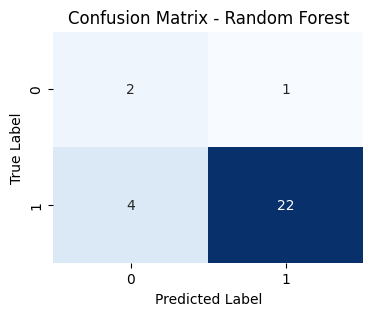

NameError: name 'precision_recall_curve' is not defined

In [ ]:

# =============================================================================
# Define Plotting Functions
# =============================================================================
def plot_conf_matrix(cm, model_name):
    """Plot a nicely formatted confusion matrix."""
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

def plot_precision_recall(y_true, y_scores, model_name):
    """Plot the Precision-Recall Curve."""
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(4,3))
    plt.plot(recall, precision, marker='.')
    plt.title(f"Precision-Recall Curve - {model_name}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()

def plot_roc(y_true, y_scores, model_name):
    """Plot the ROC Curve and display the AUC."""
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4,3))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], '--', color='gray')
    plt.title(f"ROC Curve - {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

# =============================================================================
# Model Training, Evaluation, and Visualization
# =============================================================================

results = []

for name, model in models.items():
    print(f"\n{'='*30}\nModel: {name}\n{'='*30}")

    # Train the model
    model.fit(trainX, trainY)

    # Make predictions on the test set
    predictions = model.predict(testX)

    # Calculate accuracy and other metrics
    accuracy = model.score(testX, testY)
    cm = confusion_matrix(testY, predictions)
    report = classification_report(testY, predictions)

    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)

    # Save results for summary table
    results.append([name, round(accuracy * 100, 2), cm])

    # Plot the confusion matrix
    plot_conf_matrix(cm, name)

    # For models that support probability estimates (or decision_function), plot ROC and Precision-Recall curves.
    if hasattr(model, "predict_proba"):
        # Get probability estimates for the positive class
        y_scores = model.predict_proba(testX)[:, 1]
        plot_precision_recall(testY, y_scores, name)
        plot_roc(testY, y_scores, name)
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(testX)
        plot_precision_recall(testY, y_scores, name)
        plot_roc(testY, y_scores, name)
    else:
        print(f"{name} does not support probability estimates for ROC and PR curves.")

# =============================================================================
# Summary of Model Performance
# =============================================================================
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy (%)', 'Confusion Matrix'])
print("\nSummary of Model Performance:")
print(results_df)